# Qiskit Pulse Tutorial
### By Sophy Shin, Korea Lead, Quantum & Qiskit Community, IBM Quantum
- Qiskit Advocate since 2020
- Qiskit APAC team, Korea lead, Quantum & Qiskit Community


### Coimbatore Institute of Technology Quantum Hackathon 2022 of Qiskit Fall Fest event, 10 October 2022, 10:00 AM IST

### Special Thanks to

<b>Prof. Manjula Gandhi</b>
- Qiskit Hackathon Korea Mentor: several times
- Nano Korea International Symposium - IBM Quantum Satellite Session, Oral talk

## Part 0. Near tearm devices

### Hardware
- System and device design
- Device Fabrification
- Control Hardware

[Inside of the System One](https://www.ibm.com/events/activations-quantum/?page=experience)

Learn how tens of thousands of people are using IBM Quantum computers on the IBM Cloud to explore potential future solutions to the world’s most challenging problems, such as accelerating the fight against climate change, improving the world's food supply, or uncovering nature's fundamental secrets.

### Software
- Sophisticated Compilation techniques
    - Front end (Gate Based)
    - Back end (Pulse Based) 


# Part 1: Qiskit Pulse Intro
Qiskit-Pulse is a open-source pulse-level quantum programming kit. This lower level of programming offers the user more control than programming with the QuantumCircuit.

Qiskit Pulse was release public by this paper, 14 Apr 2020: https://arxiv.org/abs/2004.06755 

The main motivation of the Qiskit pulse is provide hardware level access to the users mainly for:
- Optimal control upon the quantum hardware https://www.nature.com/articles/s41534-020-00346-2
- Error mitigation https://www.nature.com/articles/s41586-019-1040-7 
- Dynamical decoupling https://journals.aps.org/prxquantum/abstract/10.1103/PRXQuantum.1.020318 

Before learning about how to build a pulse signal for the quantum backend by using our public account without premium access, let's simply check this circuit-pulse-experiment pipeline by using qiskit just glance at the example of the typical quantum circuit - the entanglement circuit.

For this tutorial, I will use a PulseSimulator to avoide a long queuing waiting time. 

## Quantum Gate and it's Pulse

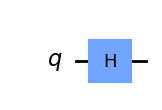

In [1]:
from qiskit import QuantumCircuit, pulse, transpile, schedule
from qiskit.pulse.library import Gaussian
from qiskit.providers.fake_provider import FakeValencia

backend = FakeValencia()

circ = QuantumCircuit(1)
circ.h(0)
circ.draw('mpl')


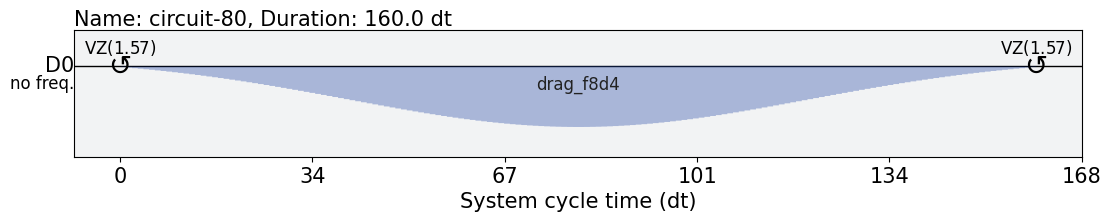

In [2]:
transpiled_circ = transpile(circ, backend)
schedule_circ = schedule(transpiled_circ, backend)
schedule_circ.draw()

In [3]:
schedule_circ.filter(channels=[pulse.DriveChannel(0)])

Schedule((0, ShiftPhase(-1.5707963268, DriveChannel(0))), (0, Play(Drag(duration=160, amp=(0.09618851775276127+0.0008448724348311288j), sigma=40, beta=-0.35835396095069005, name='drag_f8d4'), DriveChannel(0), name='drag_f8d4')), (160, ShiftPhase(-1.5707963268, DriveChannel(0))), name="circuit-80")

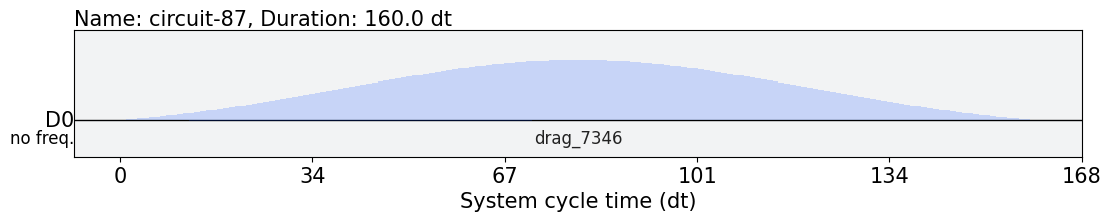

In [4]:
import numpy as np
circ = QuantumCircuit(1)
circ.x(0)
transpiled_circ = transpile(circ, backend)
schedule_circ = schedule(transpiled_circ, backend)
schedule_circ.draw()

In [5]:
schedule_circ.filter(channels=[pulse.DriveChannel(0)])

Schedule((0, Play(Drag(duration=160, amp=(0.19290084722113582+0j), sigma=40, beta=-0.25388969010654494, name='drag_7346'), DriveChannel(0), name='drag_7346')), name="circuit-87")

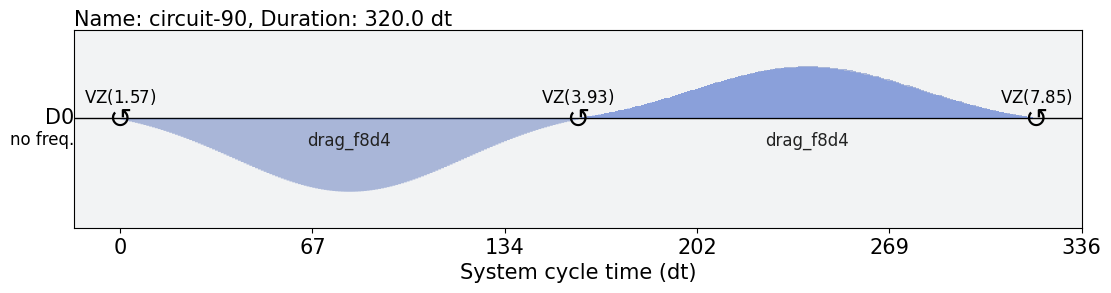

In [6]:
import numpy as np
circ = QuantumCircuit(1)
circ.rx(np.pi/4, 0)
transpiled_circ = transpile(circ, backend)
schedule_circ = schedule(transpiled_circ, backend)
schedule_circ.draw()

In [7]:
schedule_circ.filter(channels=[pulse.DriveChannel(0)])

Schedule((0, ShiftPhase(-1.5707963268, DriveChannel(0))), (0, Play(Drag(duration=160, amp=(0.09618851775276127+0.0008448724348311288j), sigma=40, beta=-0.35835396095069005, name='drag_f8d4'), DriveChannel(0), name='drag_f8d4')), (160, ShiftPhase(-3.926990817, DriveChannel(0))), (160, Play(Drag(duration=160, amp=(0.09618851775276127+0.0008448724348311288j), sigma=40, beta=-0.35835396095069005, name='drag_f8d4'), DriveChannel(0), name='drag_f8d4')), (320, ShiftPhase(-7.853981634, DriveChannel(0))), name="circuit-90")

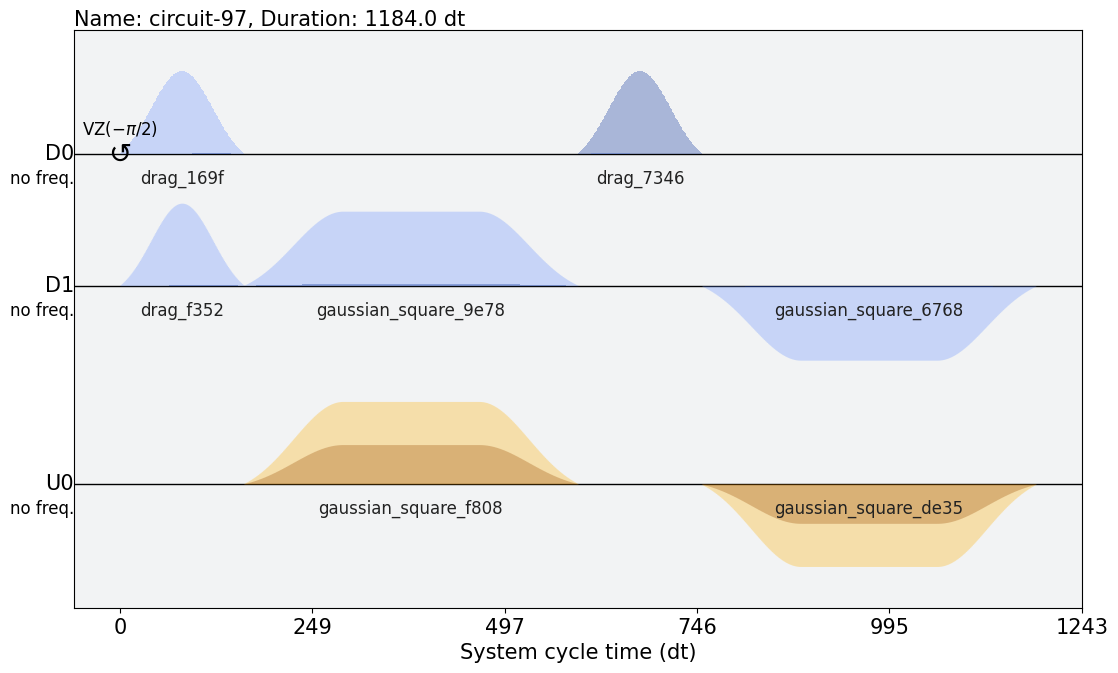

In [8]:
circ = QuantumCircuit(2)
circ.cx(0,1)
transpiled_circ = transpile(circ, backend)
schedule_circ = schedule(transpiled_circ, backend)
schedule_circ.draw()

In [9]:
#schedule_circ.filter(channels=[pulse.DriveChannel(0),pulse.DriveChannel(1)])
schedule_circ

Schedule((0, ShiftPhase(1.5707963267948966, DriveChannel(0))), (0, ShiftPhase(1.5707963267948966, ControlChannel(1))), (0, Play(Drag(duration=160, amp=(-3.543531076532649e-17-0.19290084722113582j), sigma=40, beta=-0.25388969010654494, name='drag_169f'), DriveChannel(0), name='drag_169f')), (0, Play(Drag(duration=160, amp=(0.07463911808570808+0.0005895511142621901j), sigma=40, beta=-0.5196057292826135, name='drag_f352'), DriveChannel(1), name='drag_f352')), (160, Play(GaussianSquare(duration=432, amp=(0.06738714009618253+0.001601805518381531j), sigma=64, width=176, name='gaussian_square_9e78'), DriveChannel(1), name='gaussian_square_9e78')), (160, Play(GaussianSquare(duration=432, amp=(0.3403973376528223+0.16241758678192275j), sigma=64, width=176, name='gaussian_square_f808'), ControlChannel(0), name='gaussian_square_f808')), (592, Play(Drag(duration=160, amp=(0.19290084722113582+0j), sigma=40, beta=-0.25388969010654494, name='drag_7346'), DriveChannel(0), name='drag_7346')), (752, Play

If you are interested in explore more about the cross resonance gate, please take a look this Youtube lecture by Nick bronn.

In [10]:
from IPython.display import IFrame
IFrame(src="https://youtu.be/V_as5PufUiU?t=1018", width=1200, height=675)

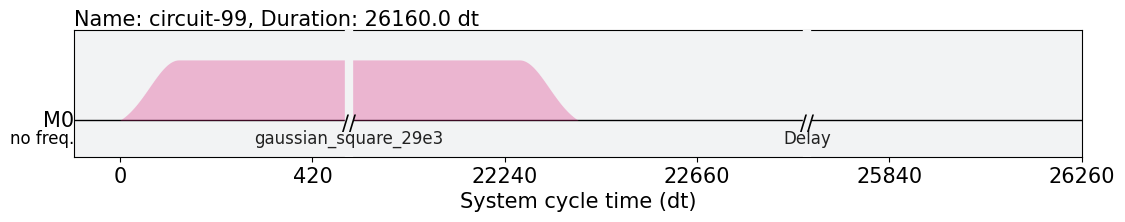

In [11]:
circ = QuantumCircuit(1)
circ.measure_all()
transpiled_circ = transpile(circ, backend)
schedule_circ = schedule(transpiled_circ, backend)
schedule_circ.draw()

In [12]:
schedule_circ

Schedule((0, Play(GaussianSquare(duration=22400, amp=(0.075+0j), sigma=64, width=22144, name='gaussian_square_29e3'), MeasureChannel(0), name='gaussian_square_29e3')), (0, Acquire(26160, AcquireChannel(0), MemorySlot(0))), (22400, Delay(3760, MeasureChannel(0))), name="circuit-99")

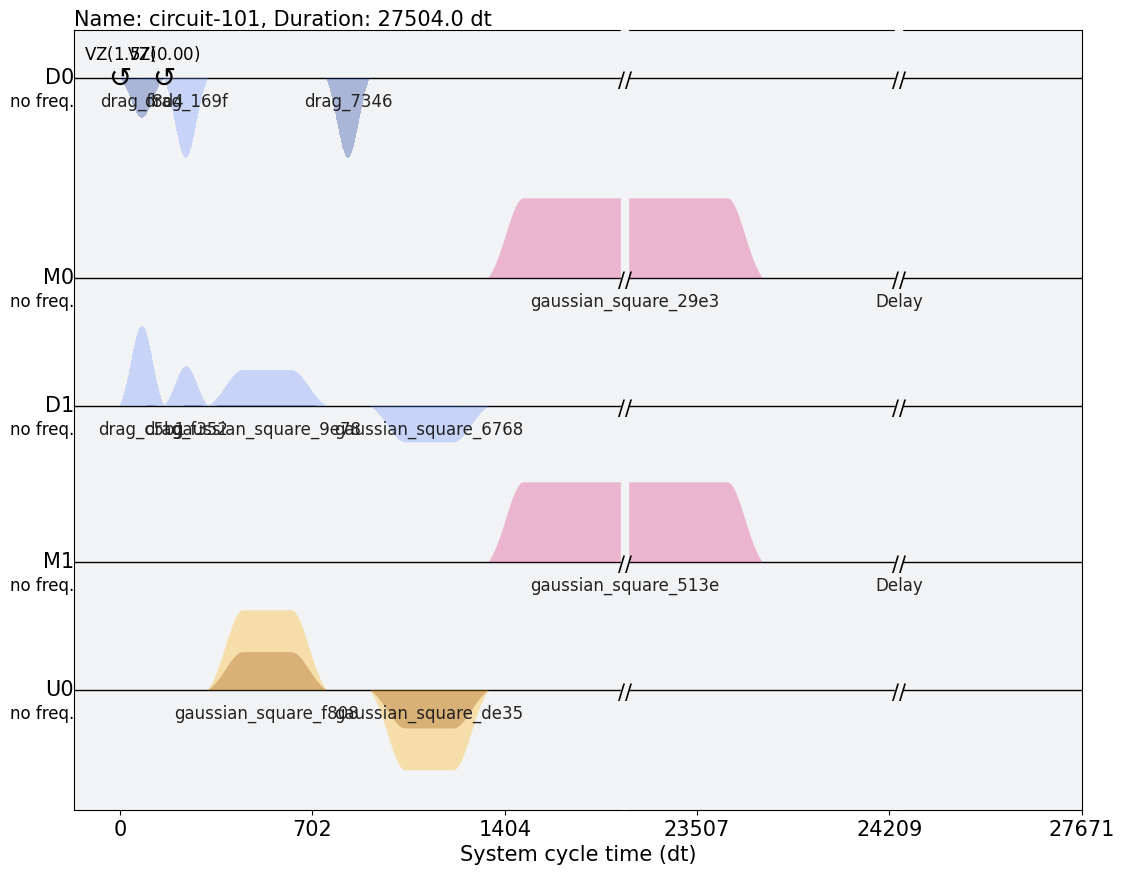

In [13]:
circ = QuantumCircuit(2)
circ.h(0)
circ.x(1)
circ.cx(0,1)
circ.measure_all()
transpiled_circ = transpile(circ, backend)
schedule_circ = schedule(transpiled_circ, backend)
schedule_circ.draw()

The main purpose of my lecture is to give you abundant tutorial materials to help you to do further research or exploration easily, so here, I will skip explaining the foundation of a superconducting qubit and theoretical things related to the dynamics of a qubit in detail.  

But I really hope that most of you take a look at additional materials which I left here to follow up about the superconducting qubit and it's foundation because there are abundant materials with kind explanation for you.

Additional materials:
- Introduction to Quantum Computing and Quantum Hardware: 
https://www.qiskit.org/learn/intro-qc-qh, especially Lecture 16 to 21
- Qiskit Seminar Series: Quantum Hardware Design: Energy, Circuits, and Metal | Zlatko Minev
https://www.youtube.com/watch?v=jjdYHZ0qxcY
- CQT Lecture: Qiskit Pulse: Programming Quantum Computers Through the Cloud with Pulses by Nick Bronn
https://www.youtube.com/watch?v=V_as5PufUiU


# Tutorial 1: Gate calibration with Qiskit Pulse Gate - Calibrate X gate (Optimal Control Example)

## Check current gate performance

In [27]:
circ = QuantumCircuit(1)
circ.x(0)
circ.measure_all()
job = backend.run(transpile(circ, backend), shots=20000)
original_counts = job.result().get_counts()

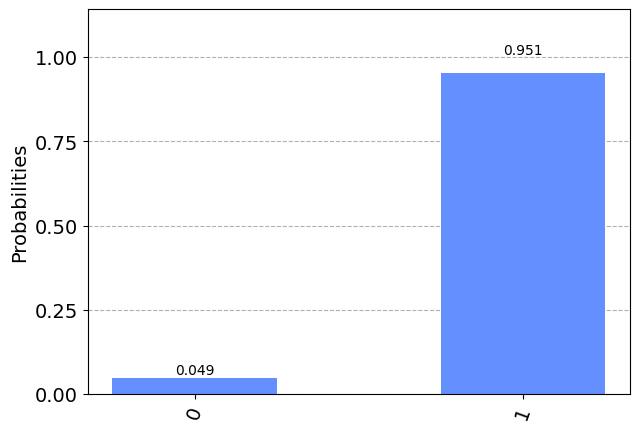

In [28]:
from qiskit.visualization import plot_histogram

plot_histogram(original_counts)

## find a best x gate - simple optimization

### build a custom gate circuit - basic

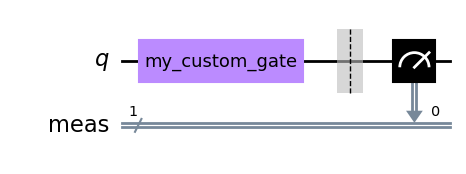

In [17]:
from qiskit.circuit import Gate, Parameter


amp = Parameter('amp')

circ = QuantumCircuit(1)
custom_gate = Gate('my_custom_gate', 1, [])

circ.append(custom_gate, [0])
circ.measure_all()

circ.draw('mpl')


In [18]:
i = 0.18

from qiskit.pulse.library import Drag

with pulse.build(backend, name='custom') as my_sched:
    pulse.play(Drag(duration=160, amp=amp, sigma=40, beta=-0.25388969010654494), pulse.drive_channel(0))
    
my_sched.assign_parameters({amp:i})


ScheduleBlock(Play(Drag(duration=160, amp=(0.18+0j), sigma=40, beta=-0.25388969010654494), DriveChannel(0)), name="custom", transform=AlignLeft())

In [21]:
circ.add_calibration(custom_gate, [0], my_sched)

In [22]:
circ_transpile = transpile(circ, backend)
circ_sched = schedule(circ_transpile, backend)

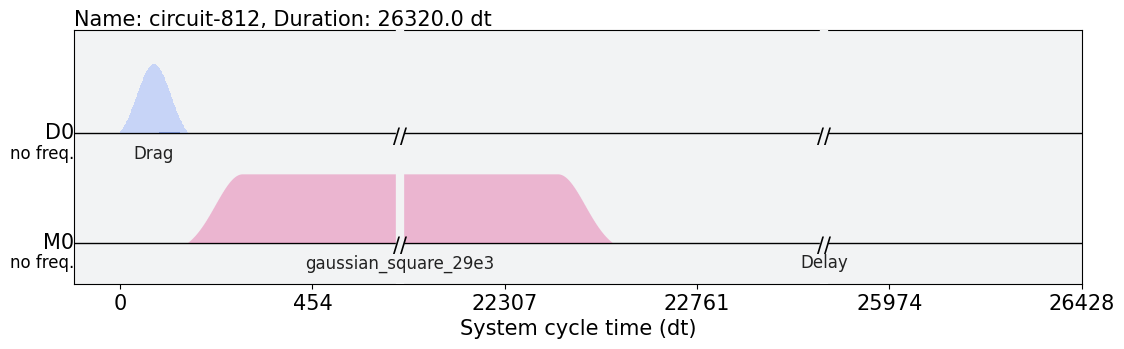

In [62]:
circ_sched.draw()

/Users/sophy/opt/anaconda3/envs/challenge/lib/python3.8/site-packages/qiskit_aer/pulse/controllers/pulse_controller.py:144: UserWarning: Warning: qubit_lo_freq was not specified in PulseQobj and there is no default, so it is being automatically determined from the drift Hamiltonian.
  warn('Warning: qubit_lo_freq was not specified in PulseQobj and there is no default, '


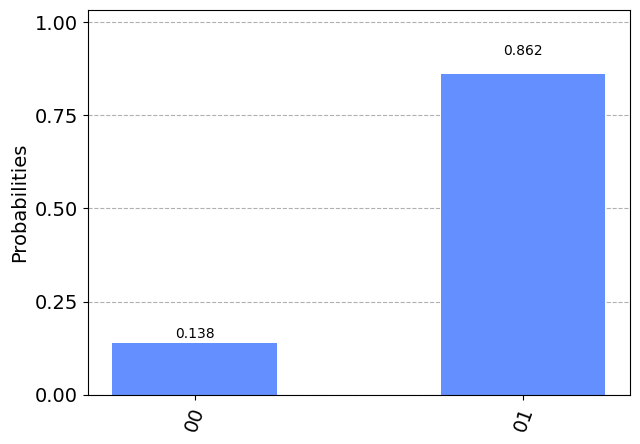

In [23]:
job = backend.run(schedule_circ, shots=20000)
counts = job.result().get_counts()
plot_histogram(counts)

### build a custom gate circuit - find the best amp value

Let's find a best amplitude value to make a "best" x Gate for the "FakeValensia" backend.

In [24]:
def amp_optimizing(parameter):
    amp = Parameter('amp')
    circ = QuantumCircuit(1)
    custom_gate = Gate('my_custom_gate', 1, [])
    circ.append(custom_gate, [0])
    circ.measure_all()
    
    with pulse.build(backend, name='custom') as my_schedule:
        pulse.play(Drag(duration=160, amp=amp, sigma=40, beta=-0.25388969010654494), pulse.drive_channel(0))
    
    my_schedule.assign_parameters({amp:parameter})
    circ.add_calibration(custom_gate, [0], my_schedule)
    
    circ_transpile = transpile(circ, backend)
    schedule_circ = schedule(circ_transpile, backend)
    
    job = backend.run(schedule_circ, shots=10000)
    counts = job.result().get_counts()
    
    if '0' in counts:
        return (counts['0'])/1024
    else:
        return 0


In [25]:
from scipy.optimize import minimize_scalar

res = minimize_scalar(amp_optimizing, bounds=(0.1, 0.2), method='bounded')

print(res.x)

0.165688307136869


Now we found a best amplitude value of X gate for the Fake Valencia! Let's plot the counts.

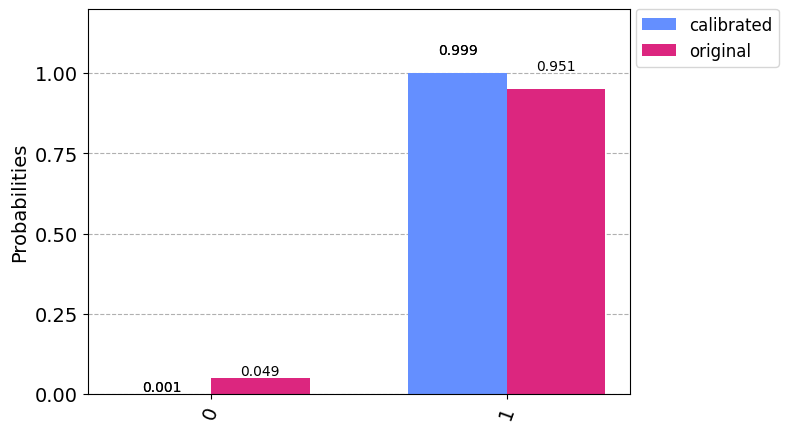

In [30]:
amp = Parameter('amp')
circ = QuantumCircuit(1)
custom_gate = Gate('my_custom_gate', 1, [])
circ.append(custom_gate, [0])
circ.measure_all()
    
with pulse.build(backend, name='custom') as best_x_sched:
    pulse.play(Drag(duration=160, amp=amp, sigma=40, beta=-0.25388969010654494), pulse.drive_channel(0))
    
best_x_sched.assign_parameters({amp:res.x})
circ.add_calibration(custom_gate, [0], best_x_sched)
    
circ_transpile = transpile(circ, backend)
schedule_circ = schedule(circ_transpile, backend)
    
job = backend.run(schedule_circ, shots=10000)
calibrated_counts = job.result().get_counts()

plot_histogram([calibrated_counts, original_counts], legend=['calibrated', 'original'])

# Tutorial 2: Gate calibration with Qiskit Pulse Gate - Calibrate CX gate (Dynamic Decoupling Example)

At this tutorial2, we will use the pulse gate for get a better CX gate performance by using the technique named Dynamic Decoupling. Below is a explanation about the Dynamic Decoupling by Nick Bronn.

Dynamic decoupling (DD) is used to increase the lifetime of quantum information.

If a qubit is idle, it becomes noisy because of decoherence, leaking information to surroundings. To prevent this idle state, we effectively disconnect the environment using so-called decoupling methods; scan the circuit for idle periods of time (i.e. those containing delay instructions) and insert a DD sequence of gates in those spots. These gates amount to the identity, so do not alter the logical action of the circuit, but have the effect of mitigating decoherence in those idle periods. However, this technique may not better the situation if you do not use a proper DD sequence because the pulses have finite lengths and do not implement perfect rotations. As a result, it is important to have an optimal decoupling sequence which does not destroy the qubit coherence instead of preserving it.

At here, we will use the best_x_sched pulse schedule for DD mitigation.

In [31]:
IFrame(src="https://www.youtube.com/watch?v=67jRWQuW3Fk", width=1200, height=675)


## Check current gate performance

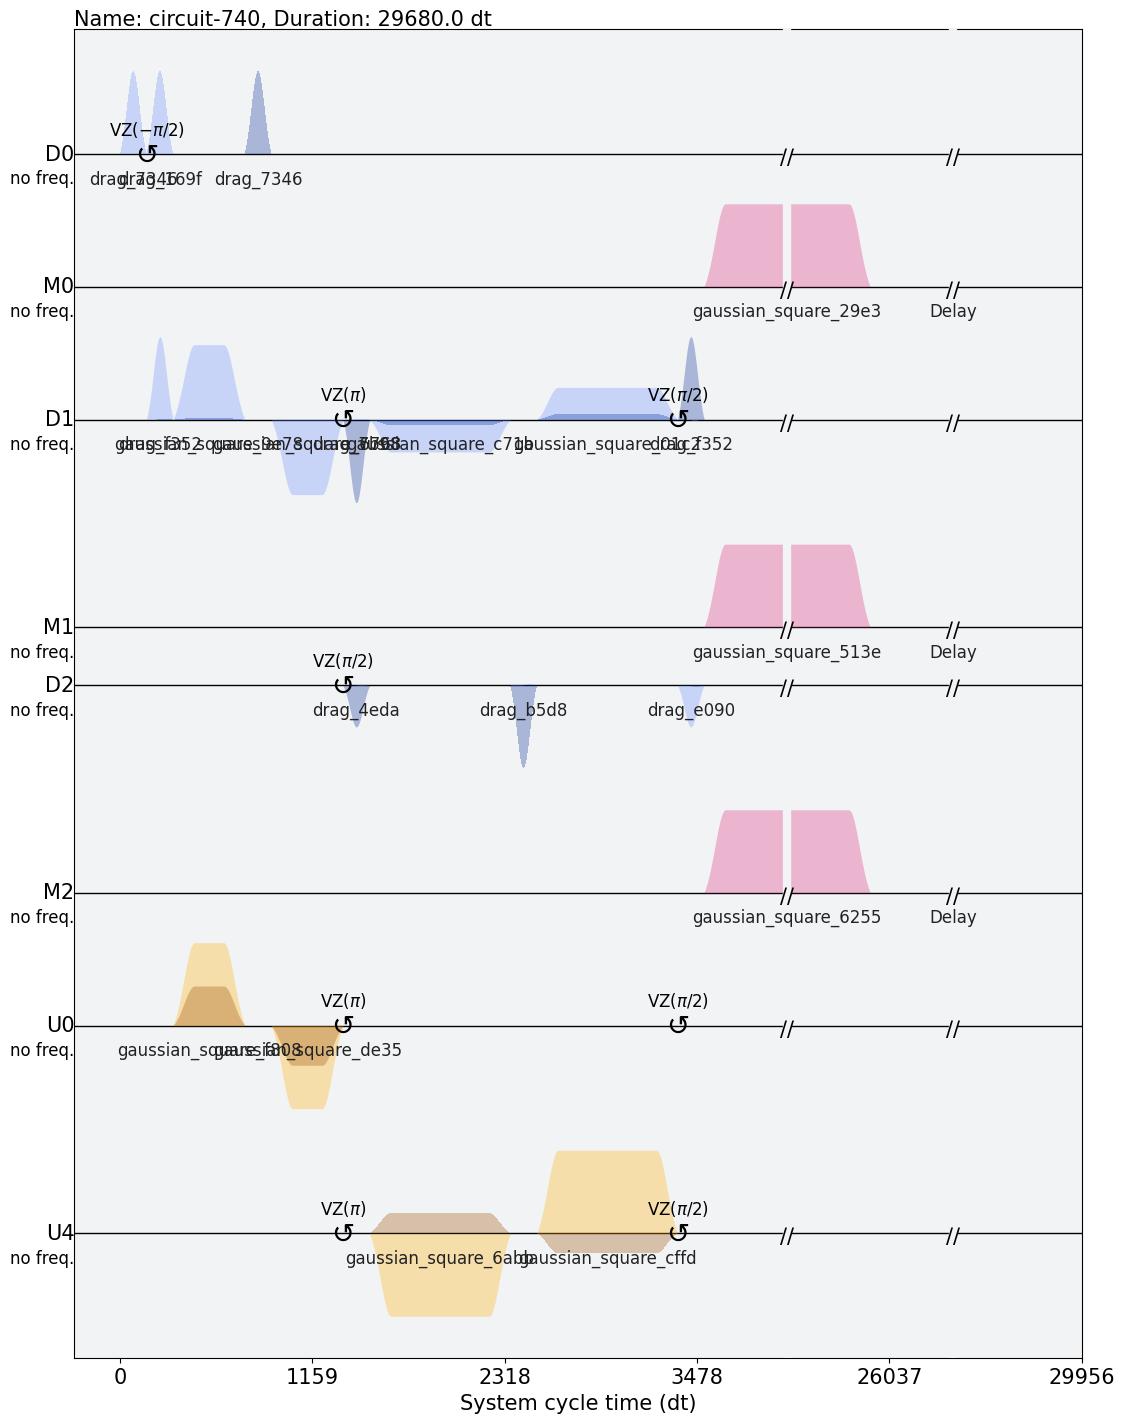

In [33]:
circ = QuantumCircuit(3)
circ.x(0)
circ.cx(0,1)
circ.cx(1,2)

circ.measure_all()
circ_trans = transpile(circ, backend)
circ_sched = schedule(circ, backend)
circ_sched.draw()

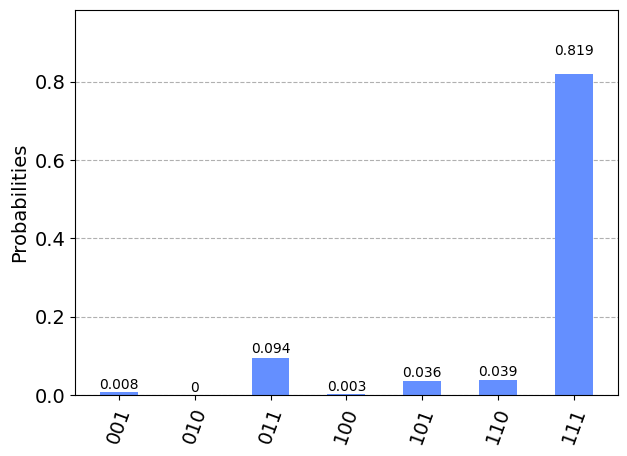

In [52]:
job = backend.run(transpile(circ, backend))
counts = job.result().get_counts()
plot_histogram(counts)

In [53]:
#Check gate duration
from qiskit.transpiler import PassManager, InstructionDurations
from qiskit.transpiler.passes import ALAPSchedule, DynamicalDecoupling
from qiskit.visualization import timeline_drawer

durations = InstructionDurations(
    [("cx", [0, 1], backend.properties().gate_length('cx', [0,1])/backend.configuration().dt), ("reset", None, 10),
     ("cx", [1, 2], backend.properties().gate_length('cx', [1,2])/backend.configuration().dt),
     ("x", None, backend.properties().gate_length('x', 0)/backend.configuration().dt), ("measure", None, 22400)]
)

print(durations)

reset: 10 dt
x: 160.0 dt
measure: 22400 dt
cx(0, 1): 1183.9999999999998 dt
cx(1, 2): 2176.0 dt



In [54]:
durations = InstructionDurations(
    [("cx", [0, 1], 1184), ("reset", None, 10),
     ("cx", [1, 2], 2176),
     ("x", None, 160), ("measure", None, 22400)]
)

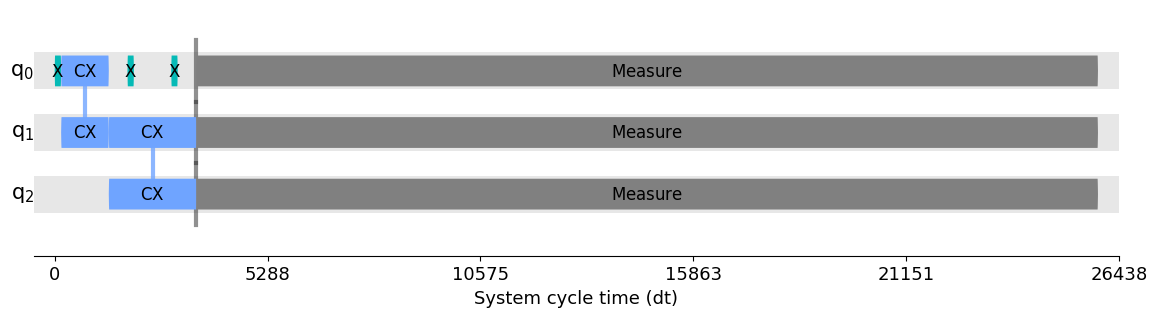

In [55]:
from qiskit.circuit.library import XGate, YGate
circ = QuantumCircuit(3)
circ.x(0)
circ.cx(0, 1)
circ.cx(1, 2)

circ.measure_all()

dd_sequence = [XGate(), XGate()]
pm = PassManager([ALAPSchedule(durations),
                  DynamicalDecoupling(durations, dd_sequence)])
circ_dd = pm.run(circ)
timeline_drawer(circ_dd)

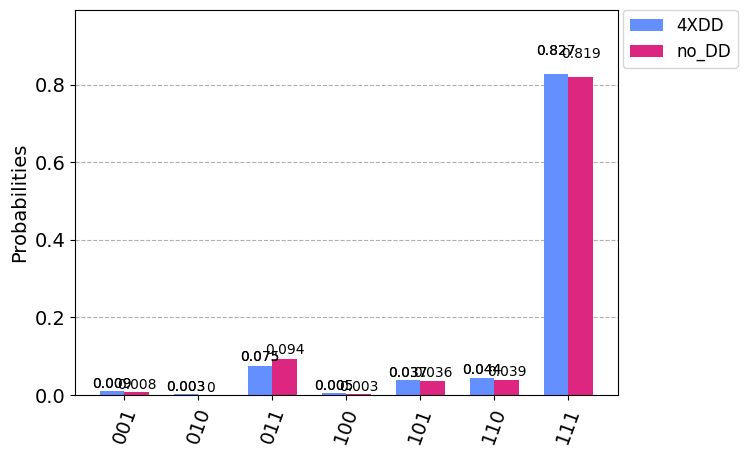

In [56]:
job = backend.run(circ_dd)
two_x_counts = job.result().get_counts()

plot_histogram([two_x_counts, counts], legend=['4XDD', 'no_DD'])